In [ ]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten,Activation
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)

In [ ]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Buoi",
    target_size=(350, 350),
    batch_size=3,
    class_mode='categorical',
    )
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/Buoi",
    target_size=(350, 350),
    batch_size=3,
    class_mode= "categorical",
    )

Found 191 images belonging to 4 classes.
Found 191 images belonging to 4 classes.


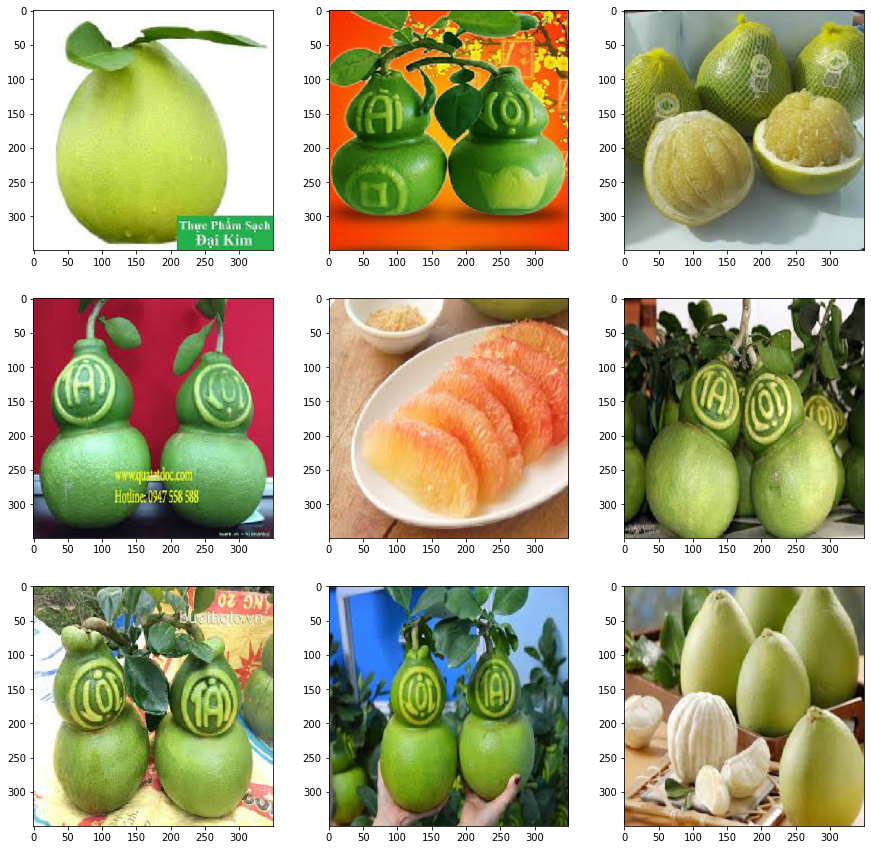

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = x_train_data.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
x_train_data.class_indices

{'.None': 0, 'Buoi da xanh': 1, 'Buoi di dang': 2, 'Buoi nam roi': 3}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Activation,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (350,350,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 256)     7168      
                                                                 
 activation (Activation)     (None, 350, 350, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      147520    
                                                                 
 activation_1 (Activation)   (None, 175, 175, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD

from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,
                  epochs=10,
                  batch_size=32,
                  verbose=1,
                  validation_data= x_test_data)

Epoch 1/10
64/64 [==============================] - 64s 805ms/step - loss: 1.2668 - accuracy: 0.3194 - val_loss: 1.0879 - val_accuracy: 0.4136
Epoch 2/10
64/64 [==============================] - 5s 82ms/step - loss: 1.1848 - accuracy: 0.3560 - val_loss: 1.1107 - val_accuracy: 0.3455
Epoch 3/10
64/64 [==============================] - 5s 82ms/step - loss: 1.1497 - accuracy: 0.3665 - val_loss: 1.0862 - val_accuracy: 0.3979
Epoch 4/10
64/64 [==============================] - 5s 82ms/step - loss: 1.0802 - accuracy: 0.4188 - val_loss: 0.9503 - val_accuracy: 0.5340
Epoch 5/10
64/64 [==============================] - 5s 82ms/step - loss: 0.9459 - accuracy: 0.5812 - val_loss: 0.7347 - val_accuracy: 0.8168
Epoch 6/10
64/64 [==============================] - 5s 82ms/step - loss: 0.6987 - accuracy: 0.7120 - val_loss: 0.3797 - val_accuracy: 0.8586
Epoch 7/10
64/64 [==============================] - 5s 83ms/step - loss: 0.4837 - accuracy: 0.8220 - val_loss: 0.2919 - val_accuracy: 0.9005
Epoch 8/10


In [ ]:
from keras.models import load_model
model.save('grapefruit2.h5')
model5 = load_model('grapefruit2.h5')

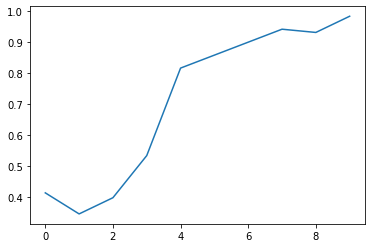

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['val_accuracy'])

(1, 350, 350, 3)

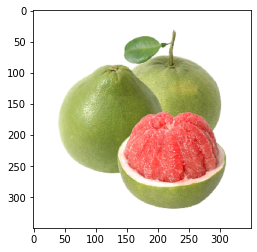

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img=load_img('/content/buoi5.jpg',target_size=(350,350))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,350,350,3)
img=img.astype('float32')
img=img/255
img.shape

In [ ]:
a=np.argmax(model5.predict(img),axis=1)


if a == 1:
  print('Buoi da xanh')
elif a == 2:
  print('Buoi di dang')
elif a == 3:
  print('Buoi nam roi')
else :
  print('None')  

Buoi da xanh
